In [1]:
from astropy.io import fits
from astropy.visualization import simple_norm
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import numpy as np

In [6]:
hdul = fits.open('/content/hlsp_heritage_hst_acs-wfc_m51_f555w_v1_drz_sci.fits')
image_data = hdul[0].data
hdul.close()


In [7]:
image_data = image_data / np.max(image_data)

In [8]:
def crop_center(img, cropx=512, cropy=512):
    y, x = img.shape
    startx = x // 2 - cropx // 2
    starty = y // 2 - cropy // 2
    return img[starty:starty+cropy, startx:startx+cropx]


In [9]:
image_data = crop_center(image_data)

noise_sigma = 0.1
noisy_image = image_data + np.random.normal(0, noise_sigma, image_data.shape)

In [10]:
image_data.shape

(512, 512)

In [12]:
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

In [13]:
gaussian_denoised = gaussian_filter(noisy_image, sigma=1)

In [14]:
def stretch_contrast(image, lower_percentile=1, upper_percentile=99):
    p_low, p_high = np.percentile(image, (lower_percentile, upper_percentile))
    stretched = np.clip(image, p_low, p_high)
    return (stretched - p_low) / (p_high - p_low + 1e-8)

original_vis = stretch_contrast(image_data)
gaussian_vis = stretch_contrast(gaussian_denoised)


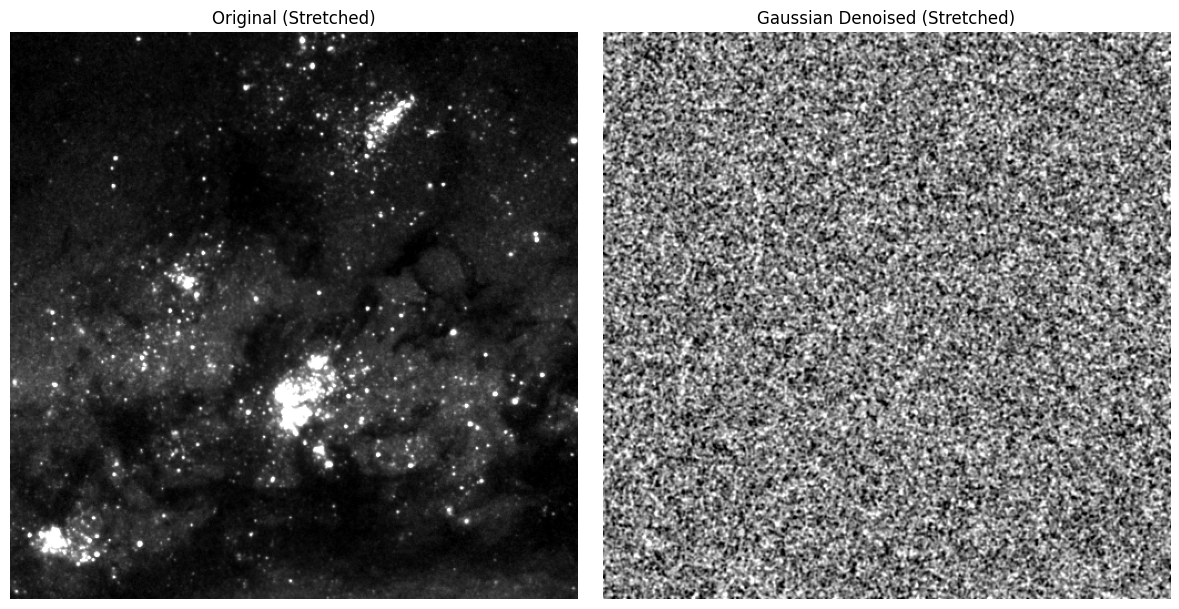

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(original_vis, cmap='gray', origin='lower')
axes[0].set_title("Original (Stretched)")
axes[0].axis('off')

axes[1].imshow(gaussian_vis, cmap='gray', origin='lower')
axes[1].set_title("Gaussian Denoised (Stretched)")
axes[1].axis('off')

plt.tight_layout()
plt.show()


In [16]:
psnr = peak_signal_noise_ratio(image_data, gaussian_denoised, data_range=1.0)
ssim = structural_similarity(image_data, gaussian_denoised, data_range=1.0)

print("Gaussian Filter → PSNR:", psnr)
print("Gaussian Filter → SSIM:", ssim)

Gaussian Filter → PSNR: 30.95372598642504
Gaussian Filter → SSIM: 0.354139305267132
